<a href="https://colab.research.google.com/github/mubashiraasma/Resume-Screening/blob/main/Resume_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import LdaModel, Word2Vec
from gensim.corpora import Dictionary
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
df = pd.read_csv("/content/UpdatedResumeDataSet.csv")

In [5]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [7]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [8]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

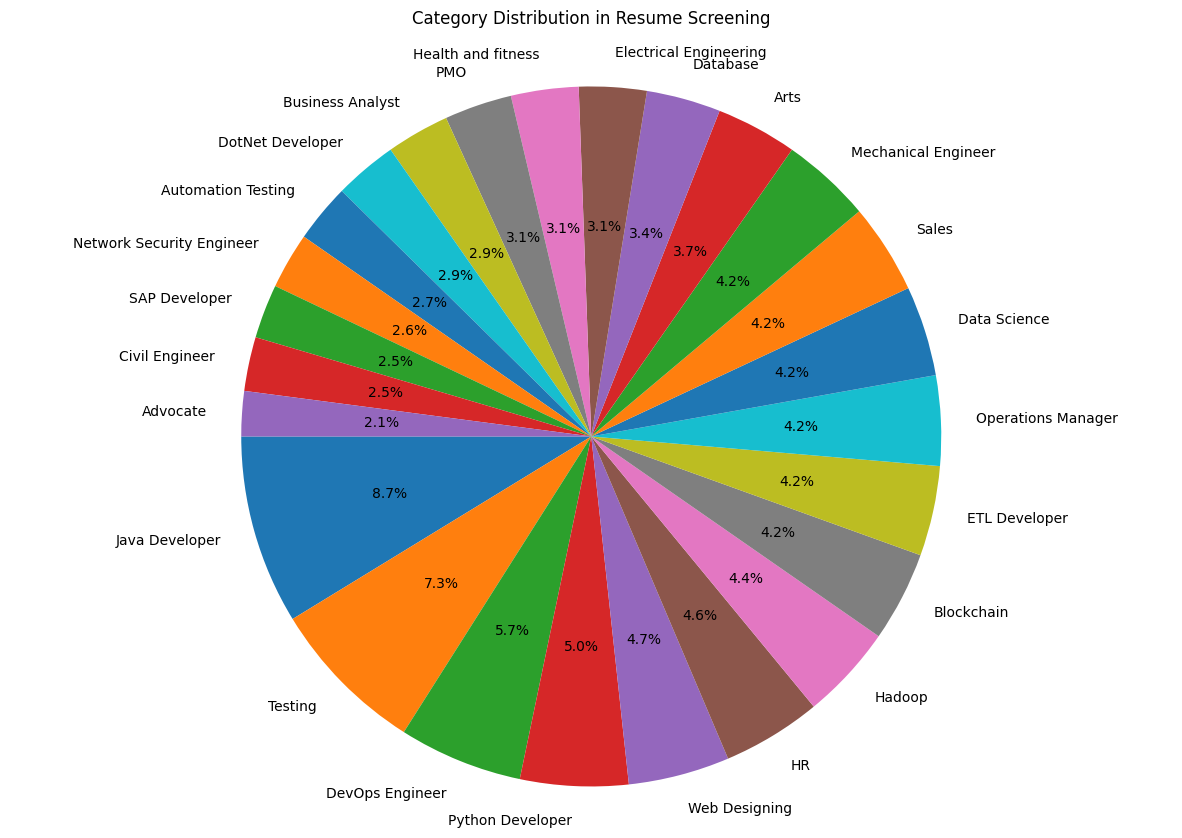

In [9]:
# Calculate category distribution
category_distribution = df['Category'].value_counts(normalize=True)

# Plot pie chart
plt.figure(figsize=(15, 10))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=180)
plt.title('Category Distribution in Resume Screening', pad=20)
plt.axis('equal')
plt.show()

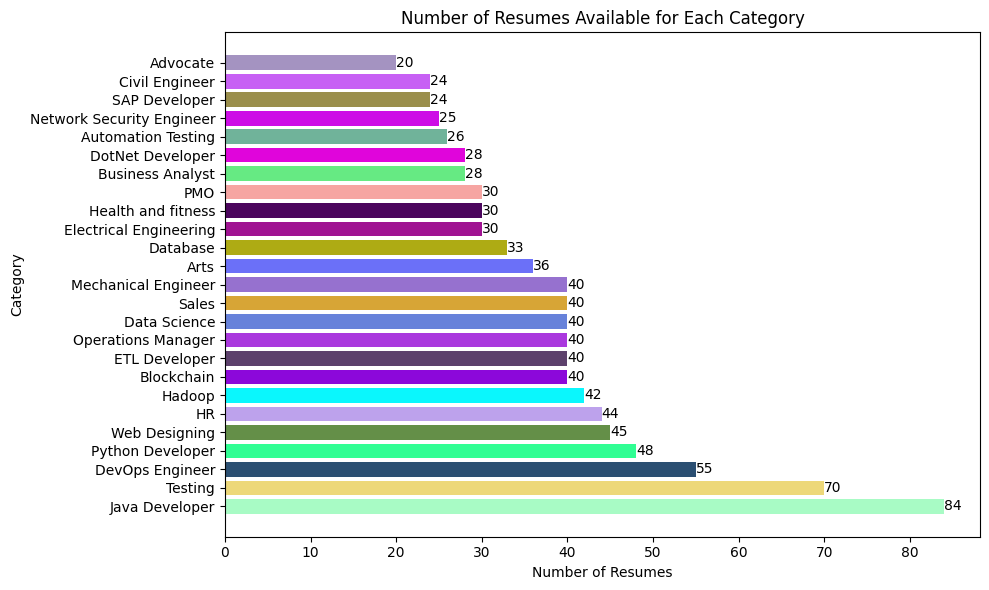

In [10]:
# Count the number of resumes for each category
category_counts = df['Category'].value_counts()

# Plot horizontal bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(category_counts.index, category_counts, color=np.random.rand(len(category_counts),3))
plt.title('Number of Resumes Available for Each Category')
plt.xlabel('Number of Resumes')
plt.ylabel('Category')

# Add the number of resumes on each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}',
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [11]:
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Define preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove RT (retweets)
    text = re.sub(r'rt\s+', '', text)

    # Remove mentions
    text = re.sub(r'@\w+', '', text)

    # Remove special characters and punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = word_tokenize(text)

    # Removing punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into text
    text = ' '.join(tokens)

    return text

# Apply preprocessing to the 'resume' column
df['clean_resume'] = df['Resume'].apply(preprocess_text)

In [12]:
# Display the preprocessed data
df['clean_resume'].head()

0    skill programming language python panda numpy ...
1    education detail may 2013 may 2017 uitrgpv dat...
2    area interest deep learning control system des...
3    skill â r â python â sap hana â tableau â sap ...
4    education detail mca ymcaust faridabad haryana...
Name: clean_resume, dtype: object

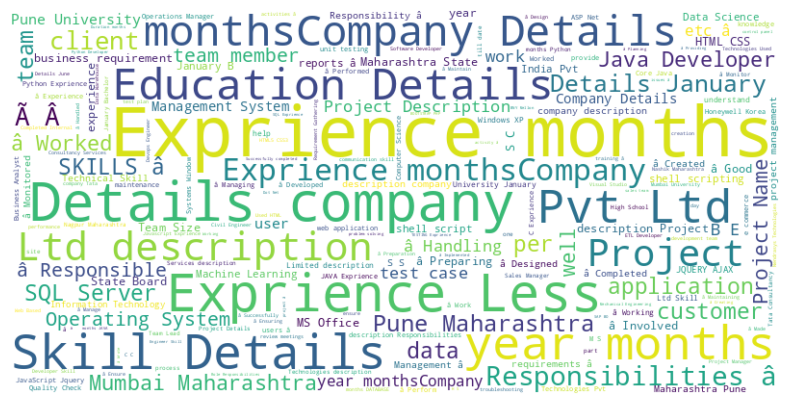

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all resumes into a single text
text = " ".join(df['Resume'])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [15]:
# Tokenize function
def tokenize(text):
    return text.split()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_resume'], df['Category'], test_size=0.2, random_state=42)

In [16]:
# Encoding category feature
encoder = OneHotEncoder()
X_train_category = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
X_test_category = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

In [18]:
# Create dictionary and corpus
dictionary = Dictionary([tokenize(text) for text in X_train])
corpus = [dictionary.doc2bow(tokenize(text)) for text in X_train]

# Train LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10, iterations=50)

In [19]:
# Transform resumes using LDA
def transform_with_lda(texts, lda_model, dictionary):
    lda_vectors = []
    for text in texts:
        clean_text = text
        lda_corpus = dictionary.doc2bow(tokenize(clean_text))
        lda_topics = lda_model.get_document_topics(lda_corpus, minimum_probability=0.0)
        lda_vector = np.zeros(lda_model.num_topics)
        for idx, value in lda_topics:
            lda_vector[idx] = value
        lda_vectors.append(lda_vector)
    return np.array(lda_vectors)

# Transforming training and test sets
lda_vectors_train = transform_with_lda(X_train, lda_model, dictionary)
lda_vectors_test = transform_with_lda(X_test, lda_model, dictionary)

In [20]:
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=[tokenize(text) for text in X_train], vector_size=100, window=5, min_count=1, workers=4)

# Function to average word vectors for a document
def average_word_vectors(words, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.
    for word in words:
        if word in model.wv:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

# Transform train data to Word2Vec embeddings
X_train_word2vec = np.array([average_word_vectors(tokenize(text), word2vec_model, 100) for text in X_train])

# Combine LDA, Word2Vec
X_train_combined = np.concatenate([X_train_word2vec, lda_vectors_train], axis=1)


In [21]:
X_train_combined.shape

(769, 105)

In [22]:
# Training Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_combined, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Evaluating the Model

# Transform test data to Word2Vec embeddings
X_test_word2vec = np.array([average_word_vectors(tokenize(text), word2vec_model, 100) for text in X_test])

# Combine LDA, Word2Vec for test data
X_test_combined = np.concatenate([X_test_word2vec, lda_vectors_test], axis=1)

# Predict on test data
y_pred = rf_model.predict(X_test_combined)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9844559585492227
Precision: 0.9869726128793486
Recall: 0.9844559585492227
F1 Score: 0.9824557518858037


In [24]:
X_test_combined.shape

(193, 105)

In [25]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_combined, y_train, cv=5, scoring='accuracy')

# Calculate mean and standard deviation of cross-validation scores
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation of Accuracy:", np.std(cv_scores))

Mean Accuracy: 0.9883032000679058
Standard Deviation of Accuracy: 0.011167916248599091


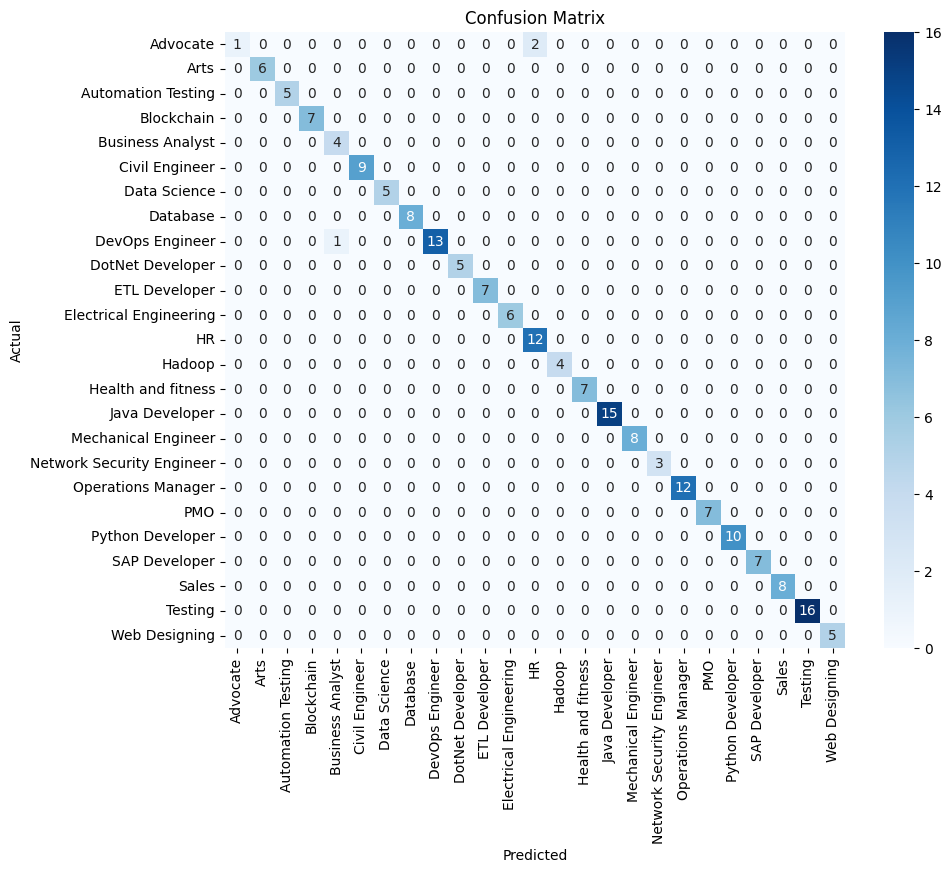

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()